<a href="https://colab.research.google.com/github/Jayatripathi11/Analysis-of-parents-affect-on-their-children-scores-in-school/blob/main/diabetes_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


First 5 Rows of Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome             

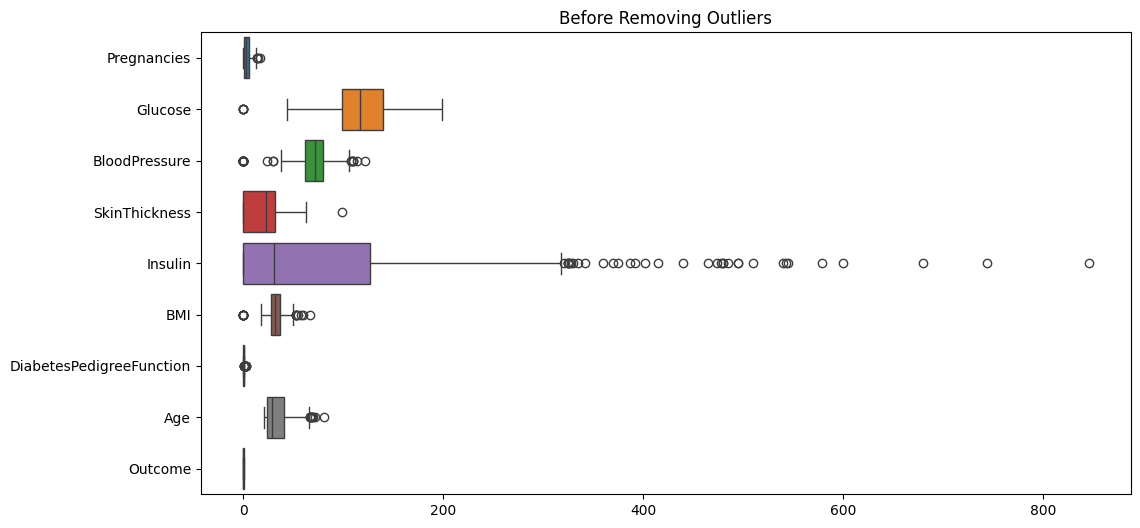

<ipython-input-4-958552d9c09a>:31: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.clip(lower=data.quantile(0.05), upper=data.quantile(0.95), axis=1)


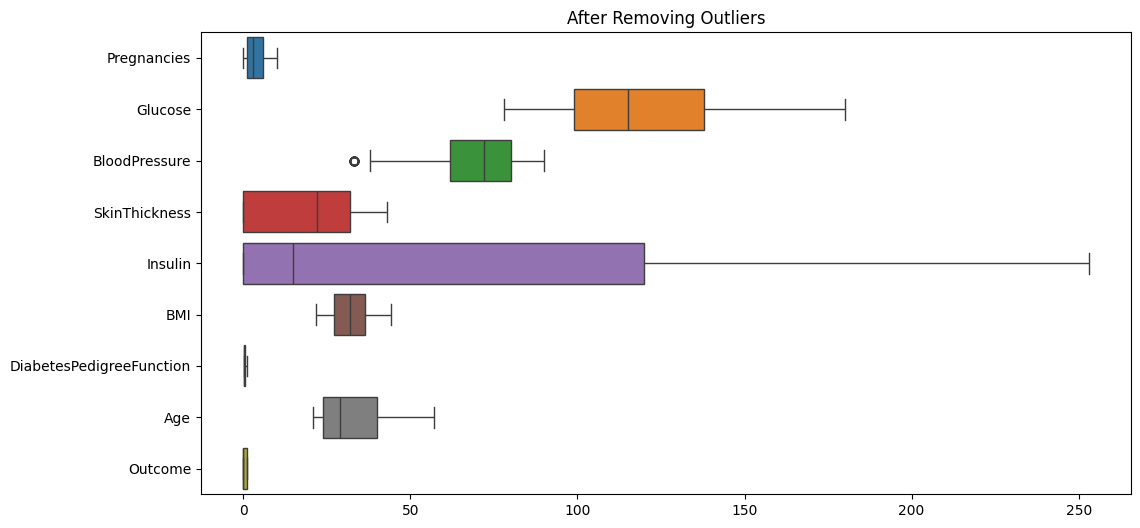


Duplicate Rows:
 Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

Data After Feature Engineering:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      180           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
5            5      116           74.0              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome   BMI_Category    Age_Group  
0                     0.627   50        1          Obese       Senior  
1                     0.351   31        0     Overweight  Middle-aged  
2                     0.672   32        1  Normal weight  Middle-aged  
3                     0.167   21        0     Overweight        Young  
5             

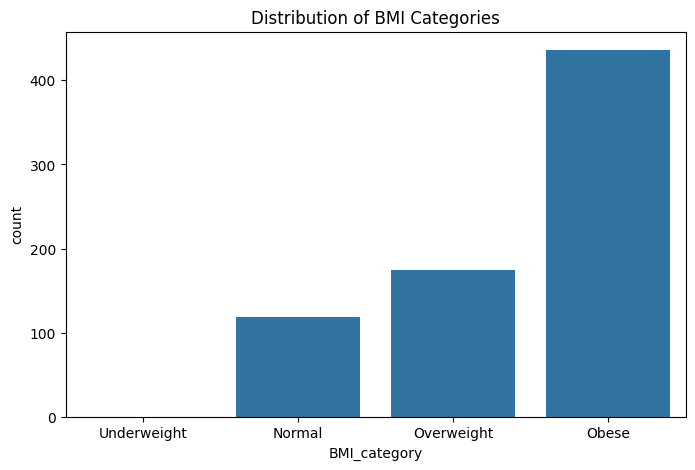

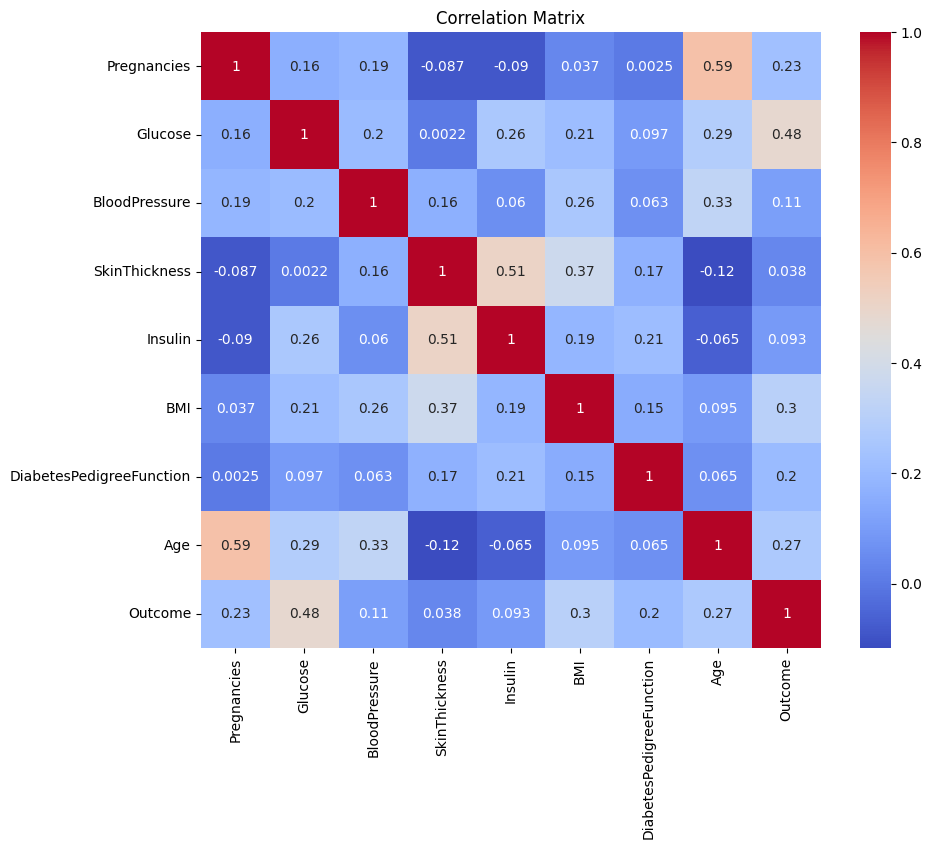


Correlation with Outcome:
 Outcome                     1.000000
Glucose                     0.482678
BMI                         0.304340
Age                         0.266172
Pregnancies                 0.226458
DiabetesPedigreeFunction    0.203525
BloodPressure               0.110085
Insulin                     0.093247
SkinThickness               0.037758
Name: Outcome, dtype: float64

Pregnancy count:
 Pregnancies
1     131
0     102
2      95
3      72
4      66
10     54
5      54
6      50
7      44
8      34
9      27
Name: count, dtype: int64


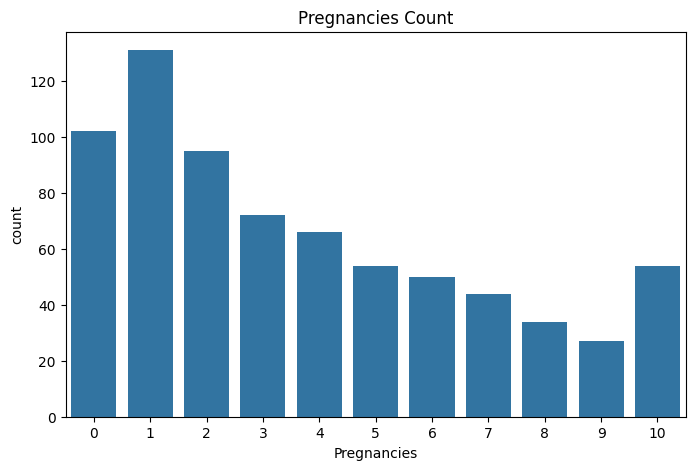


Model Accuracy: 0.80

Confusion Matrix:
 [[88 14]
 [15 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       102
           1       0.67      0.66      0.67        44

    accuracy                           0.80       146
   macro avg       0.76      0.76      0.76       146
weighted avg       0.80      0.80      0.80       146



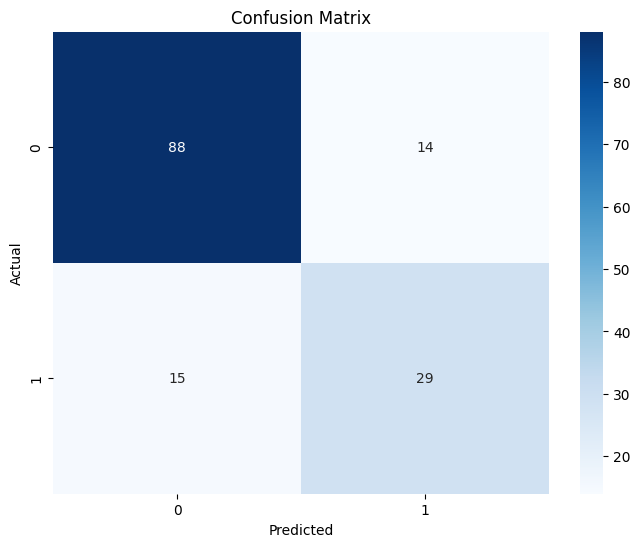


Predicted Outcome for Sample Input: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats

# Load the dataset (make sure to upload 'diabetes.csv' in Colab)
data = pd.read_csv('diabetes.csv')

# Display first few rows
print("First 5 Rows of Dataset:")
print(data.head())

# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Visualize outliers before removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h')
plt.title("Before Removing Outliers")
plt.show()

# Remove outliers using Z-score
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))
data = data[(z_scores < 3).all(axis=1)]

# Clip extreme values (winsorization)
data = data.clip(lower=data.quantile(0.05), upper=data.quantile(0.95), axis=1)
data = data.infer_objects(copy=False)

# Visualize after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h')
plt.title("After Removing Outliers")
plt.show()

# Check for duplicates
duplicate_rows = data[data.duplicated(keep='first')]
print("\nDuplicate Rows:\n", duplicate_rows)

# Feature engineering: BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data['BMI_Category'] = data['BMI'].apply(bmi_category)

# Feature engineering: Age group
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

data['Age_Group'] = data['Age'].apply(age_group)

# Show data after feature engineering
print("\nData After Feature Engineering:")
print(data.head())

# Visualize BMI category distribution
data['BMI_category'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 100],
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.figure(figsize=(8, 5))
sns.countplot(x='BMI_category', data=data)
plt.title("Distribution of BMI Categories")
plt.show()

# Correlation heatmap (only numeric columns)
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Correlation with target variable
target_correlation = correlation_matrix['Outcome'].sort_values(ascending=False)
print("\nCorrelation with Outcome:\n", target_correlation)

# Visualize pregnancy count
print("\nPregnancy count:\n", data['Pregnancies'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='Pregnancies', data=data)
plt.title("Pregnancies Count")
plt.show()

# Prepare data for model training
X = data.drop(['Outcome', 'BMI_Category', 'Age_Group', 'BMI_category'], axis=1, errors='ignore')
y = data['Outcome']

# Select only numeric features
X = X.select_dtypes(include=['float64', 'int64'])

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Test the model on a new sample input
sample = [[2, 130, 70, 20, 85, 28.1, 0.5, 35]]  # [Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DPF, Age]
prediction = model.predict(sample)
print("\nPredicted Outcome for Sample Input:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")
